# ECON 220 Lab - Week 7

Justin S. Eloriaga

Today, we will learn how to analyze financial data, something that comprises an increasing majority of economic data. We will also learn how to use API Keys, which again are increasingly popular ways to call data instead of loading data from a file.

%pip install requests

Next, we need to sign up for a FREE API Key that allows us to get stock data. https://www.alphavantage.co/support/#api-key 

Then, we import the necessary libraries

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

After this, we will specify our API Key and the path

In [2]:
API_KEY = "F12DHIKL54J6Z9VE"
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey={API_KEY}"

Then, we can begin with the data extraction

In [3]:
response = requests.get(url)
data = response.json()

# Extracting time series data
time_series = data.get("Time Series (Daily)", {})
time_series

{'2025-02-27': {'1. open': '239.4100',
  '2. high': '242.4600',
  '3. low': '237.0600',
  '4. close': '237.3000',
  '5. volume': '41153639'},
 '2025-02-26': {'1. open': '244.3300',
  '2. high': '244.9800',
  '3. low': '239.1300',
  '4. close': '240.3600',
  '5. volume': '44433564'},
 '2025-02-25': {'1. open': '248.0000',
  '2. high': '250.0000',
  '3. low': '244.9100',
  '4. close': '247.0400',
  '5. volume': '48013272'},
 '2025-02-24': {'1. open': '244.9250',
  '2. high': '248.8600',
  '3. low': '244.4200',
  '4. close': '247.1000',
  '5. volume': '51326396'},
 '2025-02-21': {'1. open': '245.9500',
  '2. high': '248.6900',
  '3. low': '245.2200',
  '4. close': '245.5500',
  '5. volume': '53197431'},
 '2025-02-20': {'1. open': '244.9400',
  '2. high': '246.7800',
  '3. low': '244.2900',
  '4. close': '245.8300',
  '5. volume': '32316907'},
 '2025-02-19': {'1. open': '244.6600',
  '2. high': '246.0100',
  '3. low': '243.1604',
  '4. close': '244.8700',
  '5. volume': '32204215'},
 '2025

As you can see, the output is quite messy. To fix this, we need to use a pandas dataframe

In [4]:
# Convert to DataFrame
df = pd.DataFrame.from_dict(time_series, orient="index")

# Rename columns to include 'AAPL'
df.columns = ["AAPL_Open", "AAPL_High", "AAPL_Low", "AAPL_Close", "AAPL_Volume"]

# Convert index to datetime
df.index = pd.to_datetime(df.index)

# Convert values to numeric type
df = df.astype(float)

# Sort by date (oldest first)
df = df.sort_index()

# Display DataFrame
print(df)

            AAPL_Open  AAPL_High  AAPL_Low  AAPL_Close  AAPL_Volume
2024-10-03    225.140    226.805    223.32      225.67   34044158.0
2024-10-04    227.900    228.000    224.13      226.80   37345098.0
2024-10-07    224.500    225.690    221.33      221.69   39505354.0
2024-10-08    224.300    225.980    223.25      225.77   31855693.0
2024-10-09    225.230    229.750    224.83      229.54   33591091.0
...               ...        ...       ...         ...          ...
2025-02-21    245.950    248.690    245.22      245.55   53197431.0
2025-02-24    244.925    248.860    244.42      247.10   51326396.0
2025-02-25    248.000    250.000    244.91      247.04   48013272.0
2025-02-26    244.330    244.980    239.13      240.36   44433564.0
2025-02-27    239.410    242.460    237.06      237.30   41153639.0

[100 rows x 5 columns]


Then, let us visualize this

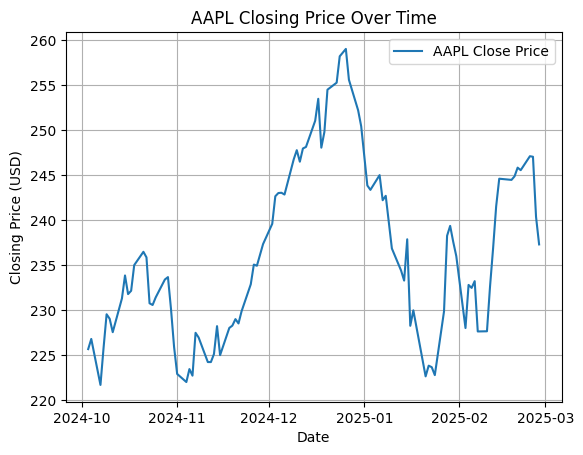

In [5]:
# Plot the AAPL_Close prices
plt.figure()
plt.plot(df.index, df["AAPL_Close"], label="AAPL Close Price")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("AAPL Closing Price Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Stock prices go up and down, clearly. From here, let us try to obtain some general statistics about the stock price

In [6]:
# Generate descriptive statistics for the AAPL_Close prices
close_price_stats = df["AAPL_Close"].describe()
print(close_price_stats)

count    100.000000
mean     236.119500
std        9.550369
min      221.690000
25%      228.250000
50%      234.125000
75%      243.482500
max      259.020000
Name: AAPL_Close, dtype: float64


The standard deviation of the stock is typically viewed as a measure of risk. However, using the raw stock price may be decieving. It is more common to typically use returns

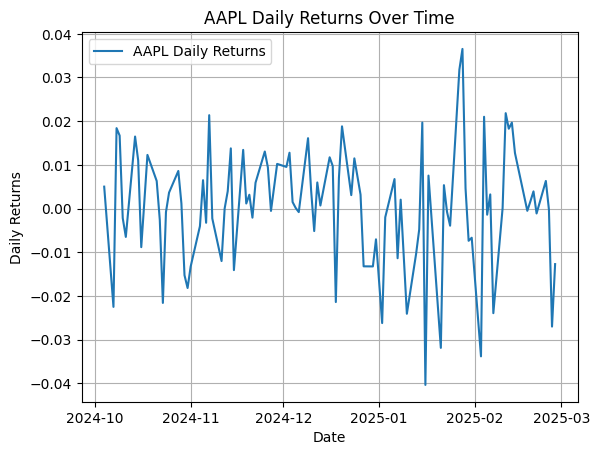

In [7]:
# Calculate daily returns
df['AAPL_Returns'] = df['AAPL_Close'].pct_change()

# Plot the returns
plt.figure()
plt.plot(df.index, df['AAPL_Returns'], label="AAPL Daily Returns")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.title("AAPL Daily Returns Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

The returns of stocks are generally random. They fluctuate but are generally a random phenomenon. In other words, the ups and downs are generally unpredictable

Now, ask the AI (i.e. use ChatGPT or Copilot) to give you code to compare AAPL stock with some benchmark index. In this case, I will compare it to a very popular ETF, the SPY, based on the S&P 500 Index. I will do the same for Bitcoin. Let's go through the AI generated code line by line and see if we can improve anything

📊 Standard Deviations:
 - AAPL Stock Price Std: 9.55
 - SPY Stock Price Std: 11.64
 - AAPL Returns Std: 0.0138
 - SPY Returns Std: 0.0080


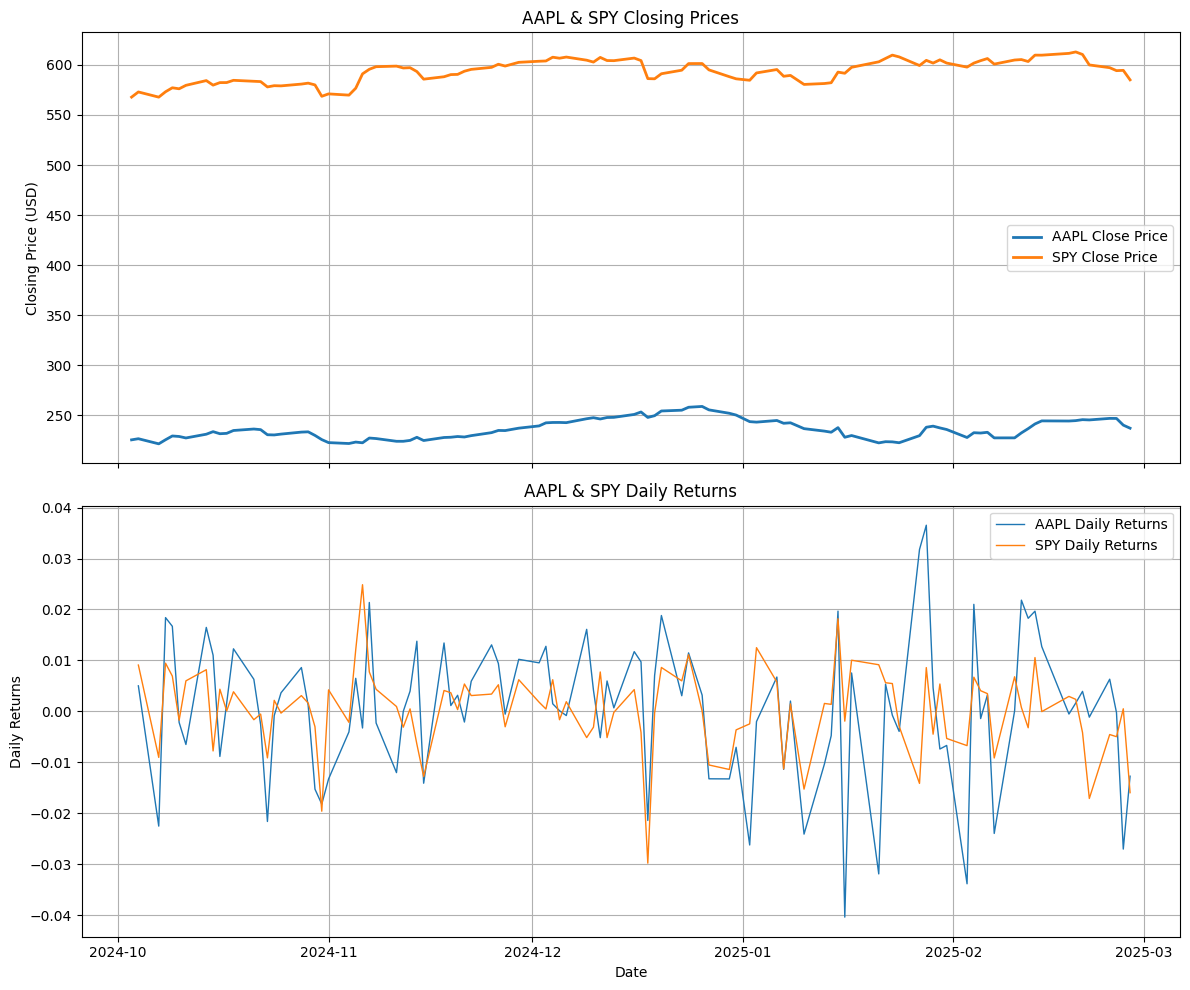

In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = "F12DHIKL54J6Z9VE"

# Fetch AAPL stock data
aapl_url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey={API_KEY}"
aapl_response = requests.get(aapl_url)
aapl_data = aapl_response.json()

# Fetch SPY (S&P 500 ETF) stock data
spy_url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&apikey={API_KEY}"
spy_response = requests.get(spy_url)
spy_data = spy_response.json()

# Extract time series data
aapl_time_series = aapl_data.get("Time Series (Daily)", {})
spy_time_series = spy_data.get("Time Series (Daily)", {})

# Convert to DataFrame
aapl_df = pd.DataFrame.from_dict(aapl_time_series, orient="index")
spy_df = pd.DataFrame.from_dict(spy_time_series, orient="index")

# Check if data is available
if aapl_df.empty or spy_df.empty:
    print("Error fetching data. Check API key or request limits.")
else:
    # Rename columns for clarity
    aapl_df.columns = ["AAPL_Open", "AAPL_High", "AAPL_Low", "AAPL_Close", "AAPL_Volume"]
    spy_df.columns = ["SPY_Open", "SPY_High", "SPY_Low", "SPY_Close", "SPY_Volume"]

    # Convert index to datetime
    aapl_df.index = pd.to_datetime(aapl_df.index)
    spy_df.index = pd.to_datetime(spy_df.index)

    # Convert values to float
    aapl_df = aapl_df.astype(float)
    spy_df = spy_df.astype(float)

    # Sort data by date
    aapl_df = aapl_df.sort_index()
    spy_df = spy_df.sort_index()

    # Merge AAPL and SPY data
    merged_df = aapl_df.join(spy_df, how="inner")

    # Calculate daily returns
    merged_df["AAPL_Returns"] = merged_df["AAPL_Close"].pct_change()
    merged_df["SPY_Returns"] = merged_df["SPY_Close"].pct_change()

    # Compute standard deviation
    aapl_price_std = merged_df["AAPL_Close"].std()
    spy_price_std = merged_df["SPY_Close"].std()
    aapl_return_std = merged_df["AAPL_Returns"].std()
    spy_return_std = merged_df["SPY_Returns"].std()

    # Print standard deviations
    print(f"📊 Standard Deviations:")
    print(f" - AAPL Stock Price Std: {aapl_price_std:.2f}")
    print(f" - SPY Stock Price Std: {spy_price_std:.2f}")
    print(f" - AAPL Returns Std: {aapl_return_std:.4f}")
    print(f" - SPY Returns Std: {spy_return_std:.4f}")

    # Create subplots
    fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot stock prices
    ax[0].plot(merged_df.index, merged_df["AAPL_Close"], label="AAPL Close Price", linewidth=2)
    ax[0].plot(merged_df.index, merged_df["SPY_Close"], label="SPY Close Price", linewidth=2)
    ax[0].set_ylabel("Closing Price (USD)")
    ax[0].set_title("AAPL & SPY Closing Prices")
    ax[0].legend()
    ax[0].grid(True)

    # Plot daily returns
    ax[1].plot(merged_df.index, merged_df["AAPL_Returns"], label="AAPL Daily Returns", linewidth=1)
    ax[1].plot(merged_df.index, merged_df["SPY_Returns"], label="SPY Daily Returns", linewidth=1)
    ax[1].set_xlabel("Date")
    ax[1].set_ylabel("Daily Returns")
    ax[1].set_title("AAPL & SPY Daily Returns")
    ax[1].legend()
    ax[1].grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

📊 Standard Deviations:
 - BTC Price Std: 13999.31
 - SPY Price Std: 11.64
 - BTC Returns Std: 0.0316
 - SPY Returns Std: 0.0080


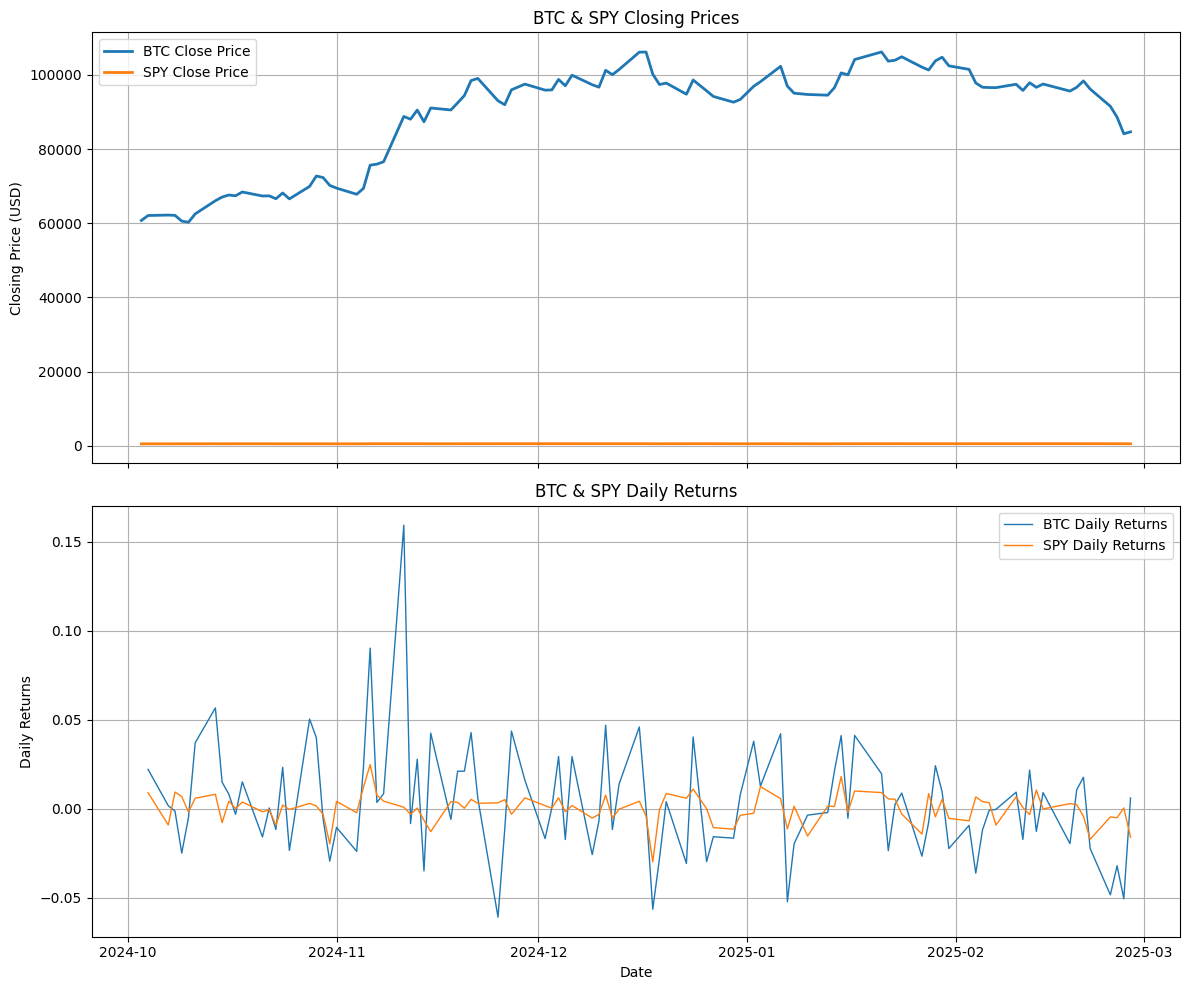

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

API_KEY = "F12DHIKL54J6Z9VE"

# Fetch Bitcoin (BTC) Data
btc_url = f"https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey={API_KEY}"
btc_response = requests.get(btc_url)
btc_data = btc_response.json()

# Fetch SPY (S&P 500 ETF) Data
spy_url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&apikey={API_KEY}"
spy_response = requests.get(spy_url)
spy_data = spy_response.json()

# Extract time series data
btc_time_series = btc_data.get("Time Series (Digital Currency Daily)", {})
spy_time_series = spy_data.get("Time Series (Daily)", {})

# Convert to DataFrame
btc_df = pd.DataFrame.from_dict(btc_time_series, orient="index")
spy_df = pd.DataFrame.from_dict(spy_time_series, orient="index")

# Check if data is available
if btc_df.empty or spy_df.empty:
    print("❌ Error fetching data. Check API key or request limits.")
    print("🔎 BTC Data Structure:")
    print(json.dumps(btc_data, indent=4))  # Print BTC response for debugging
else:
    # Expected BTC column names
    btc_columns = ["1. open", "2. high", "3. low", "4. close"]

    # Check if expected columns exist
    if not all(col in btc_df.columns for col in btc_columns):
        print("❌ Unexpected BTC data format! Check API response.")
        print("🔎 BTC Data Sample:", btc_df.head())  # Show sample data
    else:
        # Rename BTC columns
        btc_df = btc_df[btc_columns]
        btc_df.columns = ["BTC_Open", "BTC_High", "BTC_Low", "BTC_Close"]

        # Rename SPY columns
        spy_df.columns = ["SPY_Open", "SPY_High", "SPY_Low", "SPY_Close", "SPY_Volume"]

        # Convert index to datetime
        btc_df.index = pd.to_datetime(btc_df.index)
        spy_df.index = pd.to_datetime(spy_df.index)

        # Convert values to float
        btc_df = btc_df.astype(float)
        spy_df = spy_df.astype(float)

        # Sort data by date
        btc_df = btc_df.sort_index()
        spy_df = spy_df.sort_index()

        # Merge BTC and SPY data
        merged_df = btc_df.join(spy_df, how="inner")

        # Calculate daily returns
        merged_df["BTC_Returns"] = merged_df["BTC_Close"].pct_change()
        merged_df["SPY_Returns"] = merged_df["SPY_Close"].pct_change()

        # Compute standard deviation
        btc_price_std = merged_df["BTC_Close"].std()
        spy_price_std = merged_df["SPY_Close"].std()
        btc_return_std = merged_df["BTC_Returns"].std()
        spy_return_std = merged_df["SPY_Returns"].std()

        # Print standard deviations
        print(f"📊 Standard Deviations:")
        print(f" - BTC Price Std: {btc_price_std:.2f}")
        print(f" - SPY Price Std: {spy_price_std:.2f}")
        print(f" - BTC Returns Std: {btc_return_std:.4f}")
        print(f" - SPY Returns Std: {spy_return_std:.4f}")

        # Create subplots
        fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

        # Plot stock prices
        ax[0].plot(merged_df.index, merged_df["BTC_Close"], label="BTC Close Price", linewidth=2)
        ax[0].plot(merged_df.index, merged_df["SPY_Close"], label="SPY Close Price", linewidth=2)
        ax[0].set_ylabel("Closing Price (USD)")
        ax[0].set_title("BTC & SPY Closing Prices")
        ax[0].legend()
        ax[0].grid(True)

        # Plot daily returns
        ax[1].plot(merged_df.index, merged_df["BTC_Returns"], label="BTC Daily Returns", linewidth=1)
        ax[1].plot(merged_df.index, merged_df["SPY_Returns"], label="SPY Daily Returns", linewidth=1)
        ax[1].set_xlabel("Date")
        ax[1].set_ylabel("Daily Returns")
        ax[1].set_title("BTC & SPY Daily Returns")
        ax[1].legend()
        ax[1].grid(True)

        # Show the plot
        plt.tight_layout()
        plt.show()

Try and experiment by calculating the correlations. 